<a href="https://colab.research.google.com/github/KrishVM-4687/Python-DAV-Projects/blob/main/Employee_Performance_and_Salary_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

Data Overview
1. Combine Datasets
2. Split Columns (Joining date column into years and months)
3. Fill missing performance score with median score or mark the feedback column with "No Review"


Data Analysis
1. Group age into categories ("Young", "Mid-Career", "Senior") [Discretization of continuous data]
2. Categorize Salary into "Low", "Medium", "High"


Data Visualization
1. Visualize Distribution of performance score by department
2. Compare distribution of Salary across different Job roles
3. Show the average performance score for each department
4. Explore relationship between years at company and salary
5. Show correlation between various numeric attributes like age, salary, years at company and performance score.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data into Pandas Dataframe

In [ ]:
!gdown 1SwXTti16yV29o-ILEtEt7K43lD2l2ixY

Downloading...
From: https://drive.google.com/uc?id=1SwXTti16yV29o-ILEtEt7K43lD2l2ixY
To: /content/Employee_Demographics.csv
100% 70.1k/70.1k [00:00<00:00, 58.8MB/s]


In [ ]:
Employee_Demographics = pd.read_csv("Employee_Demographics.csv")

In [ ]:
Employee_Demographics.head()

,employee_id,age,gender,department,job_role
0,W1829469,49,M,Human Resources,Human Resource Director
1,W1335460,47,F,Research & Development,R&D Director
2,W2019862,23,M,Human Resources,Executive
3,W1433748,31,F,Human Resources,Regional HR Spoc
4,W2056284,53,M,Human Resources,Human Resource Director


In [ ]:
!gdown 1tDEsfofxWhbsjI04atdmv2z3ns3rXCpe

Downloading...
From: https://drive.google.com/uc?id=1tDEsfofxWhbsjI04atdmv2z3ns3rXCpe
To: /content/Performance_Reviews.csv
100% 52.8k/52.8k [00:00<00:00, 54.3MB/s]


In [ ]:
Performance_Reviews = pd.read_csv("Performance_Reviews.csv")

In [ ]:
Performance_Reviews.head()

,employee_id,performance_score,review_date,manager_feedback
0,W1829469,6.0,09-03-2025,Good work
1,W1335460,5.0,18-02-2025,Needs Improvement
2,W2019862,5.0,25-01-2025,Needs Improvement
3,W1433748,6.0,20-01-2025,Good work
4,W2056284,7.0,21-02-2025,Good work


In [ ]:
!gdown 1QD2ssa0SSdP8TH8eRScFjli5tbOTN-1z

Downloading...
From: https://drive.google.com/uc?id=1QD2ssa0SSdP8TH8eRScFjli5tbOTN-1z
To: /content/Salary_and_Benefits.csv
100% 38.4k/38.4k [00:00<00:00, 72.5MB/s]


In [ ]:
Salary_and_Benefits = pd.read_csv("Salary_and_Benefits.csv")

In [ ]:
Salary_and_Benefits.head()

,employee_id,salary,bonus,years_at_company
0,W1829469,150000,30000,12
1,W1335460,225000,45000,25
2,W2019862,50000,10000,10
3,W1433748,100000,20000,7
4,W2056284,150000,30000,6


# Data Overview

In [ ]:
Employee_Demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   employee_id  1500 non-null   object
 1    age         1500 non-null   int64 
 2    gender      1500 non-null   object
 3    department  1500 non-null   object
 4    job_role    1500 non-null   object
dtypes: int64(1), object(4)
memory usage: 58.7+ KB


In [ ]:
Performance_Reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   employee_id         1500 non-null   object 
 1    performance_score  1479 non-null   float64
 2    review_date        1500 non-null   object 
 3    manager_feedback   1479 non-null   object 
dtypes: float64(1), object(3)
memory usage: 47.0+ KB


**Observation:** There are some blank fields in Performance Review dataframe.

**Action point:** Need to fill the blank fields before Data Analysis

In [ ]:
Salary_and_Benefits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   employee_id        1500 non-null   object
 1    salary            1500 non-null   int64 
 2    bonus             1500 non-null   int64 
 3    years_at_company  1500 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 47.0+ KB


**Requirement No. 1:** Combine the datasets

In [ ]:
df = pd.merge(Employee_Demographics, Performance_Reviews, on='employee_id')

In [ ]:
df.head()

,employee_id,age,gender,department,job_role,performance_score,review_date,manager_feedback
0,W1829469,49,M,Human Resources,Human Resource Director,6.0,09-03-2025,Good work
1,W1335460,47,F,Research & Development,R&D Director,5.0,18-02-2025,Needs Improvement
2,W2019862,23,M,Human Resources,Executive,5.0,25-01-2025,Needs Improvement
3,W1433748,31,F,Human Resources,Regional HR Spoc,6.0,20-01-2025,Good work
4,W2056284,53,M,Human Resources,Human Resource Director,7.0,21-02-2025,Good work


In [ ]:
df = pd.merge(df, Salary_and_Benefits, on='employee_id')

In [ ]:
df.head()

,employee_id,age,gender,department,job_role,performance_score,review_date,manager_feedback,salary,bonus,years_at_company
0,W1829469,49,M,Human Resources,Human Resource Director,6.0,09-03-2025,Good work,150000,30000,12
1,W1335460,47,F,Research & Development,R&D Director,5.0,18-02-2025,Needs Improvement,225000,45000,25
2,W2019862,23,M,Human Resources,Executive,5.0,25-01-2025,Needs Improvement,50000,10000,10
3,W1433748,31,F,Human Resources,Regional HR Spoc,6.0,20-01-2025,Good work,100000,20000,7
4,W2056284,53,M,Human Resources,Human Resource Director,7.0,21-02-2025,Good work,150000,30000,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   employee_id         1500 non-null   object 
 1    age                1500 non-null   int64  
 2    gender             1500 non-null   object 
 3    department         1500 non-null   object 
 4    job_role           1500 non-null   object 
 5    performance_score  1479 non-null   float64
 6    review_date        1500 non-null   object 
 7    manager_feedback   1479 non-null   object 
 8    salary             1500 non-null   int64  
 9    bonus              1500 non-null   int64  
 10   years_at_company   1500 non-null   int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 129.0+ KB


**Observation:** There is still blank data in the combined dataframe

**Requirement No. 2:** Split Columns (Joining date column into years and months)

In [ ]:
#Step 1: Change the date format of review_date column from dd-mm-yyyy to yyyy-mm-dd for pandas readability
df[' review_date'] = pd.to_datetime(df[' review_date'], format='%d-%m-%Y')

In [ ]:
#Step 2: Add year and month columns
df['year'] = df[' review_date'].dt.year
df['month'] = df[' review_date'].dt.month

In [ ]:
df.head()

,employee_id,age,gender,department,job_role,performance_score,review_date,manager_feedback,salary,bonus,years_at_company,year,month
0,W1829469,49,M,Human Resources,Human Resource Director,6.0,2025-03-09,Good work,150000,30000,12,2025,3
1,W1335460,47,F,Research & Development,R&D Director,5.0,2025-02-18,Needs Improvement,225000,45000,25,2025,2
2,W2019862,23,M,Human Resources,Executive,5.0,2025-01-25,Needs Improvement,50000,10000,10,2025,1
3,W1433748,31,F,Human Resources,Regional HR Spoc,6.0,2025-01-20,Good work,100000,20000,7,2025,1
4,W2056284,53,M,Human Resources,Human Resource Director,7.0,2025-02-21,Good work,150000,30000,6,2025,2


In [ ]:
print(df.columns)

Index(['employee_id', ' age', ' gender', ' department', ' job_role',
       ' performance_score', ' review_date', ' manager_feedback', ' salary',
       ' bonus', ' years_at_company', 'year', 'month'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
print(df.columns)

Index(['employee_id', 'age', 'gender', 'department', 'job_role',
       'performance_score', 'review_date', 'manager_feedback', 'salary',
       'bonus', 'years_at_company', 'year', 'month'],
      dtype='object')


In [ ]:
df.head()

,employee_id,age,gender,department,job_role,performance_score,review_date,manager_feedback,salary,bonus,years_at_company,year,month
0,W1829469,49,M,Human Resources,Human Resource Director,6.0,2025-03-09,Good work,150000,30000,12,2025,3
1,W1335460,47,F,Research & Development,R&D Director,5.0,2025-02-18,Needs Improvement,225000,45000,25,2025,2
2,W2019862,23,M,Human Resources,Executive,5.0,2025-01-25,Needs Improvement,50000,10000,10,2025,1
3,W1433748,31,F,Human Resources,Regional HR Spoc,6.0,2025-01-20,Good work,100000,20000,7,2025,1
4,W2056284,53,M,Human Resources,Human Resource Director,7.0,2025-02-21,Good work,150000,30000,6,2025,2


In [ ]:
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Apply the mapping to the 'Month' column
df['month'] = df['month'].map(month_mapping)

In [ ]:
df.head()

,employee_id,age,gender,department,job_role,performance_score,review_date,manager_feedback,salary,bonus,years_at_company,year,month
0,W1829469,49,M,Human Resources,Human Resource Director,6.0,2025-03-09,Good work,150000,30000,12,2025,Mar
1,W1335460,47,F,Research & Development,R&D Director,5.0,2025-02-18,Needs Improvement,225000,45000,25,2025,Feb
2,W2019862,23,M,Human Resources,Executive,5.0,2025-01-25,Needs Improvement,50000,10000,10,2025,Jan
3,W1433748,31,F,Human Resources,Regional HR Spoc,6.0,2025-01-20,Good work,100000,20000,7,2025,Jan
4,W2056284,53,M,Human Resources,Human Resource Director,7.0,2025-02-21,Good work,150000,30000,6,2025,Feb


**Requirement No. 3:** Fill missing performance score with median score

In [ ]:
# Group the DataFrame by 'department' and fill the blank values
# in 'performance_score' with the median of each group.
df['performance_score'] = df.groupby('department')['performance_score'].transform(
    lambda x: x.fillna(x.median())
)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   employee_id        1500 non-null   object        
 1   age                1500 non-null   int64         
 2   gender             1500 non-null   object        
 3   department         1500 non-null   object        
 4   job_role           1500 non-null   object        
 5   performance_score  1500 non-null   float64       
 6   review_date        1500 non-null   datetime64[ns]
 7   manager_feedback   1479 non-null   object        
 8   salary             1500 non-null   int64         
 9   bonus              1500 non-null   int64         
 10  years_at_company   1500 non-null   int64         
 11  year               1500 non-null   int32         
 12  month              1500 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(4), object(6)

**Observation:** lambda function is used to fill the blank fields in performance score column

**Action Point:** Need to know how many ways can lambda function be used

 **Requirement No. 3b:** mark the feedback column with "No Review"

In [ ]:
# Fill the blank fields in the 'products' column
df['manager_feedback'] = df['manager_feedback'].fillna('No Review')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   employee_id        1500 non-null   object        
 1   age                1500 non-null   int64         
 2   gender             1500 non-null   object        
 3   department         1500 non-null   object        
 4   job_role           1500 non-null   object        
 5   performance_score  1500 non-null   float64       
 6   review_date        1500 non-null   datetime64[ns]
 7   manager_feedback   1500 non-null   object        
 8   salary             1500 non-null   int64         
 9   bonus              1500 non-null   int64         
 10  years_at_company   1500 non-null   int64         
 11  year               1500 non-null   int32         
 12  month              1500 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(4), object(6)

# Data Analysis

In [ ]:
df.head()

,employee_id,age,gender,department,job_role,performance_score,review_date,manager_feedback,salary,bonus,years_at_company,year,month
0,W1829469,49,M,Human Resources,Human Resource Director,6.0,2025-03-09,Good work,150000,30000,12,2025,Mar
1,W1335460,47,F,Research & Development,R&D Director,5.0,2025-02-18,Needs Improvement,225000,45000,25,2025,Feb
2,W2019862,23,M,Human Resources,Executive,5.0,2025-01-25,Needs Improvement,50000,10000,10,2025,Jan
3,W1433748,31,F,Human Resources,Regional HR Spoc,6.0,2025-01-20,Good work,100000,20000,7,2025,Jan
4,W2056284,53,M,Human Resources,Human Resource Director,7.0,2025-02-21,Good work,150000,30000,6,2025,Feb


**Requirement No. 4:** Group age into categories ("Young", "Mid-Career", "Senior") [Discretization of continuous data]

In [ ]:
# ages below 30: Youth, ages 30-45: Mid-Career, ages above 45: Senior

df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 30, 45, float('inf')],
    labels=['Youth', 'Mid-Career', 'Senior']
)

In [ ]:
df.head()

,employee_id,age,gender,department,job_role,performance_score,review_date,manager_feedback,salary,bonus,years_at_company,year,month,age_group
0,W1829469,49,M,Human Resources,Human Resource Director,6.0,2025-03-09,Good work,150000,30000,12,2025,Mar,Senior
1,W1335460,47,F,Research & Development,R&D Director,5.0,2025-02-18,Needs Improvement,225000,45000,25,2025,Feb,Senior
2,W2019862,23,M,Human Resources,Executive,5.0,2025-01-25,Needs Improvement,50000,10000,10,2025,Jan,Youth
3,W1433748,31,F,Human Resources,Regional HR Spoc,6.0,2025-01-20,Good work,100000,20000,7,2025,Jan,Mid-Career
4,W2056284,53,M,Human Resources,Human Resource Director,7.0,2025-02-21,Good work,150000,30000,6,2025,Feb,Senior


**Requirement No. 5:** Categorize Salary into "Low", "Medium", "High"

In [ ]:
#Categorize Salary based on Median, Salary below Median is low, Salary above Median is High
median_salary = df['salary'].median()
df['salary_category'] = pd.cut(
    df['salary'],
    bins=[0, median_salary, float('inf')],
    labels=['Low', 'High']
)

In [ ]:
df.head()

,employee_id,age,gender,department,job_role,performance_score,review_date,manager_feedback,salary,bonus,years_at_company,year,month,age_group,salary_category
0,W1829469,49,M,Human Resources,Human Resource Director,6.0,2025-03-09,Good work,150000,30000,12,2025,Mar,Senior,High
1,W1335460,47,F,Research & Development,R&D Director,5.0,2025-02-18,Needs Improvement,225000,45000,25,2025,Feb,Senior,High
2,W2019862,23,M,Human Resources,Executive,5.0,2025-01-25,Needs Improvement,50000,10000,10,2025,Jan,Youth,Low
3,W1433748,31,F,Human Resources,Regional HR Spoc,6.0,2025-01-20,Good work,100000,20000,7,2025,Jan,Mid-Career,Low
4,W2056284,53,M,Human Resources,Human Resource Director,7.0,2025-02-21,Good work,150000,30000,6,2025,Feb,Senior,High


# Data Visualization

**Requirement No 5:** Visualize Performance Score by Department

Performance Score though in numerical, they are categorical and Department is also Categorical. We would use stacked bar chart to compare Categorical vs Categorical.

In [ ]:
#Step 1: Pivot the data for easier plotting

pivot_df = df.pivot_table(index='department', columns='performance_score', values='employee_id', aggfunc='count')

In [ ]:
pivot_df.head()

performance_score,5.0,6.0,7.0,8.0
department,,,,
Human Resources,142,189,171,167
Research & Development,79,92,75,74
Sales,122,123,138,128


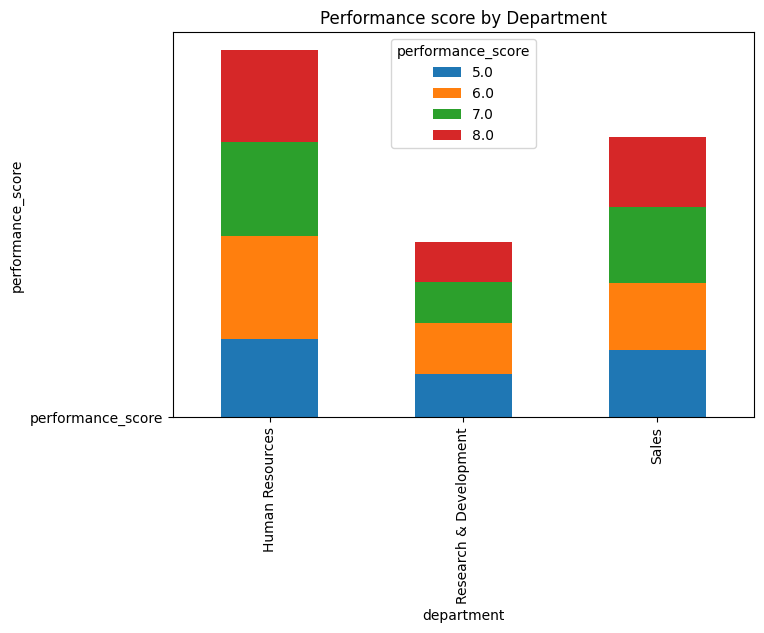

In [63]:
#Step 2: depict the plotin stacked bar chart

pivot_df.plot(kind='bar',stacked=True,figsize=(7.5,5))
plt.xlabel('department')
plt.ylabel('performance_score')
plt.title('Performance score by Department')
plt.bar('department','performance_score',width=0.1)
plt.show()

Manager Feedback is another example of categorical data. This would be yet another example of visualization of categorical vs categorical data.

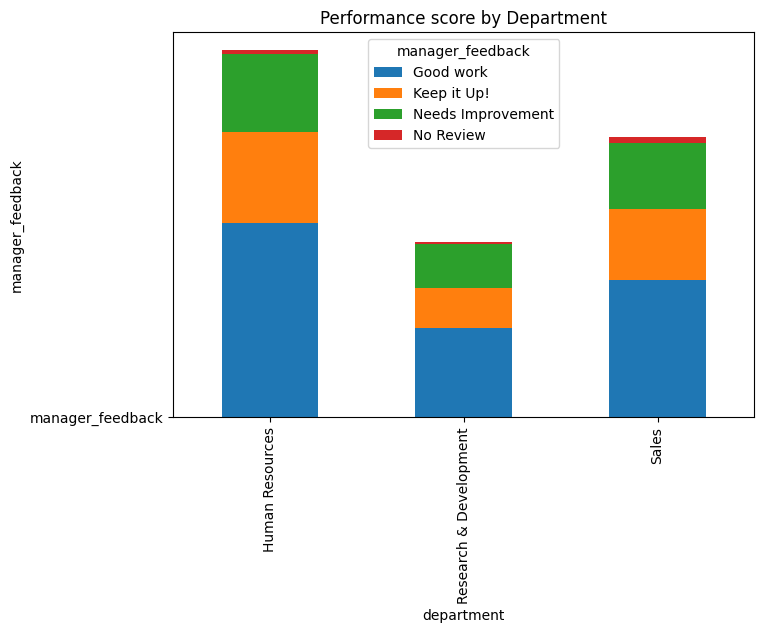

In [68]:
#Step 1: Pivot the data for easier plotting
pivot_df = df.pivot_table(index='department', columns='manager_feedback', values='employee_id', aggfunc='count')

#Step 2: depict the plotin stacked bar chart
pivot_df.plot(kind='bar',stacked=True,figsize=(7.5,5))
plt.xlabel('department')
plt.ylabel('manager_feedback')
plt.title('Performance score by Department')
plt.bar('department','manager_feedback',width=0.1)
plt.show()

**Requirement No. 6:** Compare distribution of Salary across different Job roles

Salary is continuous data and Job Roles are categorical,
to compare Categorical with continuous we use Box plot

In [64]:
df.columns

Index(['employee_id', 'age', 'gender', 'department', 'job_role',
       'performance_score', 'review_date', 'manager_feedback', 'salary',
       'bonus', 'years_at_company', 'year', 'month', 'age_group',
       'salary_category'],
      dtype='object')

In [65]:
#Step 1: Pivot the data for easier plotting

pivot2_df = df.pivot_table(index='job_role', columns='salary_category', values='salary', aggfunc='count')

/tmp/ipython-input-2112298508.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot2_df = df.pivot_table(index='job_role', columns='salary_category', values='salary', aggfunc='count')


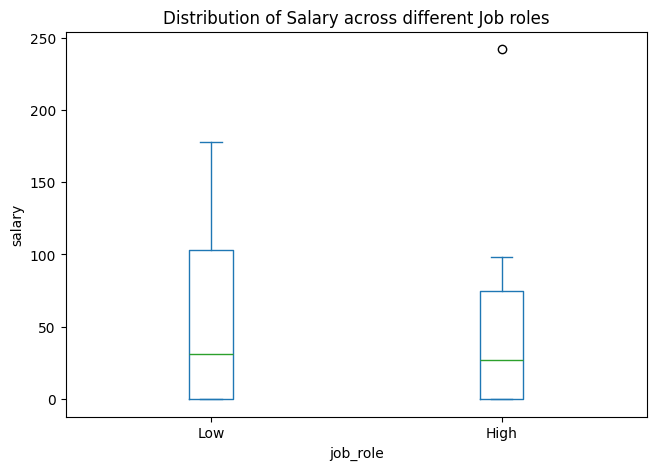

In [66]:
#Step 2: Use Box plot to compare

pivot2_df.plot(kind='box',figsize=(7.5,5))
plt.xlabel('job_role')
plt.ylabel('salary')
plt.title('Distribution of Salary across different Job roles')
plt.show()

Use a bar chart to show the average performance score for each department (Categorical vs Continuous)

<Axes: xlabel='department'>

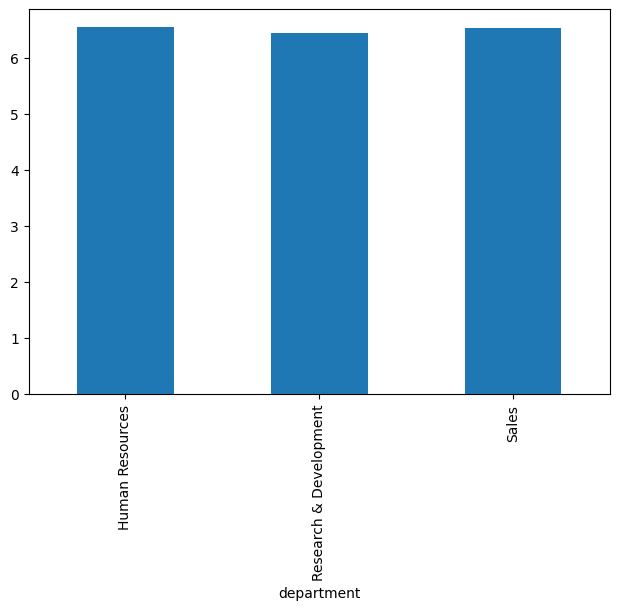

In [70]:
df.groupby('department')['performance_score'].mean().plot(kind='bar',figsize=(7.5,5))

Create a scatter plot to explore relationship between years at company and salary (Continuous vs Continuous)

In [71]:
df.columns

Index(['employee_id', 'age', 'gender', 'department', 'job_role',
       'performance_score', 'review_date', 'manager_feedback', 'salary',
       'bonus', 'years_at_company', 'year', 'month', 'age_group',
       'salary_category'],
      dtype='object')

In [79]:
#Create a scatter plot to explore relationship between years at company and salary
pivot_df = df.pivot_table(index='years_at_company', columns='salary', values='employee_id', aggfunc='count')
pivot_df.plot(kind='scatter',figsize=(7.5,5))
plt

ValueError: scatter requires an x and y column

Use a heatmap to show correlation between various numeric attributes like age, salary, years at company and performance score.

In [80]:
#Use a heatmap to show correlation between various numeric attributes like age, salary, years at company and performance score.
pivot4_df = df.pivot_table(index='age', columns='salary', values='performance_score', aggfunc='count')
pivot4_df.plot(kind='heatmap',figsize=(7.5,5))
plt.show()

ValueError: heatmap is not a valid plot kind Valid plot kinds: ('line', 'bar', 'barh', 'kde', 'density', 'area', 'hist', 'box', 'pie', 'scatter', 'hexbin')